In [2]:
# We've to load multiple packages to do the analysis

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Step 1. Importing the data

In [5]:
# Load airbnb_price.csv in prices

prices = pd.read_csv("prices.csv")

In [6]:
# Load airbnb_room_type.xlsx in xls

xls = pd.ExcelFile("room_types.xlsx")

In [7]:
# Parse the first sheet from xls, room_types

room_types = xls.parse(0)

In [8]:
# Load airbnb_last_review.tsv, reviews

reviews = pd.read_csv("reviews.tsv",sep = "\t")

In [9]:
# Display the first few rows

In [10]:
prices.head()

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


In [11]:
reviews.head()

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


In [12]:
room_types.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [13]:
# Check the dimensions of the dataset

In [14]:
prices.shape

(25209, 3)

In [15]:
reviews.shape

(25209, 3)

In [16]:
room_types.shape

(25209, 3)

In [17]:
# Check the data types of columns

In [18]:
prices.dtypes

listing_id      int64
price          object
nbhood_full    object
dtype: object

In [19]:
reviews.dtypes

listing_id      int64
host_name      object
last_review    object
dtype: object

In [20]:
room_types.dtypes

listing_id      int64
description    object
room_type      object
dtype: object

In [21]:
# Get summary statistics

In [22]:
prices.describe()

,listing_id
count,2.520900e+04
mean,2.068922e+07
std,1.102928e+07
min,2.595000e+03
25%,1.202273e+07
50%,2.234391e+07
75%,3.037669e+07
max,3.645581e+07


In [23]:
reviews.describe()

,listing_id
count,2.520900e+04
mean,2.068922e+07
std,1.102928e+07
min,2.595000e+03
25%,1.202273e+07
50%,2.234391e+07
75%,3.037669e+07
max,3.645581e+07


In [24]:
room_types.describe()

,listing_id
count,2.520900e+04
mean,2.068922e+07
std,1.102928e+07
min,2.595000e+03
25%,1.202273e+07
50%,2.234391e+07
75%,3.037669e+07
max,3.645581e+07


In [25]:
# Check for missing values

In [26]:
prices.isnull().sum()

listing_id     0
price          0
nbhood_full    0
dtype: int64

In [27]:
reviews.isnull().sum()

listing_id     0
host_name      8
last_review    0
dtype: int64

In [28]:
room_types.isnull().sum()

listing_id      0
description    10
room_type       0
dtype: int64

In [29]:
# Step 2. Cleaning the price column

In [30]:
# Remove whitespace and string characters from prices column

prices["price"] = prices["price"].str.replace(" dollars", "")

In [31]:
# Convert prices column to numeric datatype

prices["price"] = pd.to_numeric(prices["price"])

In [32]:
# Step 3. Calculating average price

In [33]:
prices.describe()

,listing_id,price
count,2.520900e+04,25209.000000
mean,2.068922e+07,141.777936
std,1.102928e+07,147.349137
min,2.595000e+03,0.000000
25%,1.202273e+07,69.000000
50%,2.234391e+07,105.000000
75%,3.037669e+07,175.000000
max,3.645581e+07,7500.000000


In [34]:
# To Remove Outliers: Calculate the first quartile (Q1) and third quartile (Q3)

Q1 = prices["price"].quantile(0.25)
Q3 = prices["price"].quantile(0.75)

In [35]:
# Calculate the interquartile range (IQR)

IQR = Q3 - Q1

In [36]:
# Define the upper and lower bounds to identify outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [37]:
# Filter the DataFrame to remove outliers

filtered_prices = prices[(prices["price"] >= lower_bound) & (prices["price"] <= upper_bound)]

In [38]:
#  Resulting DataFrame after removing the outliers

print(filtered_prices.head())  

   listing_id  price                nbhood_full
0        2595    225         Manhattan, Midtown
1        3831     89     Brooklyn, Clinton Hill
2        5099    200     Manhattan, Murray Hill
3        5178     79  Manhattan, Hell's Kitchen
4        5238    150       Manhattan, Chinatown


In [39]:
# Plot a graph of filtered prices

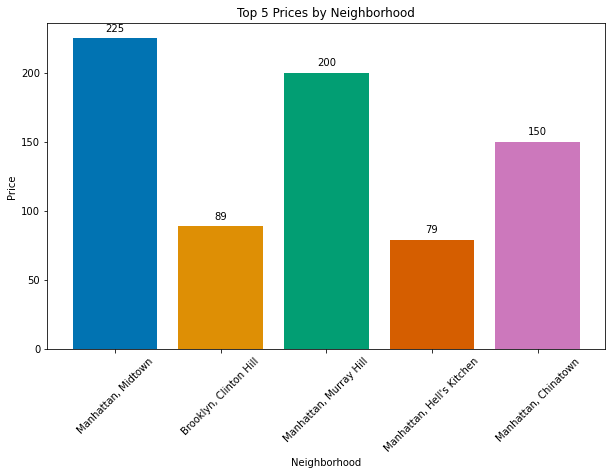

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 5 listings
top_listings = filtered_prices.head(5)

# Define a color blindness-friendly color palette
colors = sns.color_palette('colorblind')

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_listings['nbhood_full'], top_listings['price'], color=colors)

# Add labels to each bar
for i, price in enumerate(top_listings['price']):
    plt.text(i, price + 5, str(price), ha='center', color='black')

# Customize plot
plt.title('Top 5 Prices by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


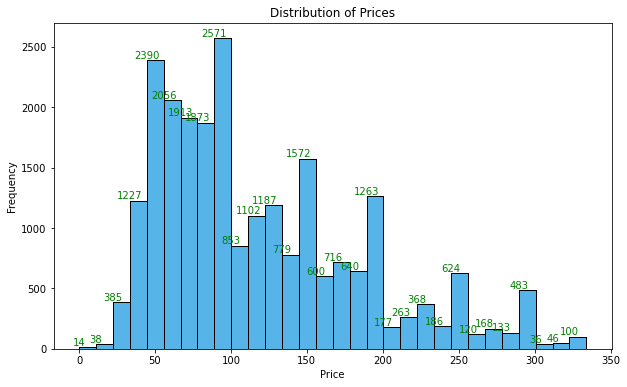

In [41]:
# Set color palette for color-blind friendly colors
colors = sns.color_palette('colorblind')

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_prices["price"], bins=30, edgecolor='black', color=colors[0])

# Add values to the histogram bars
counts, bins, _ = plt.hist(filtered_prices["price"], bins=30, edgecolor='black', color=colors[9])
for count, bin in zip(counts, bins):
    if count > 0:
        plt.text(bin, count, str(int(count)), ha='center', va='bottom', color='green')

# Customize plot
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()



In [42]:
# Subset prices for listings costing $0, free_listings

free_listings = prices["price"] == 0

In [43]:
# Update prices by removing all free listings from prices

prices = prices.loc[~free_listings]

In [44]:
# Calculate the average price, avg_price

avg_price = round(prices["price"].mean(), 2)

In [45]:
avg_price

141.82

In [46]:
# Plot a graph for average prices

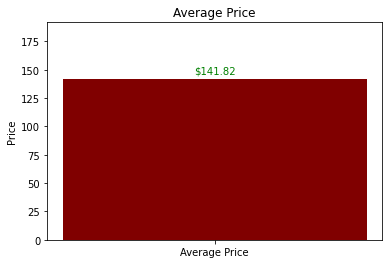

In [47]:
# Calculate the average price
avg_price = round(prices["price"].mean(), 2)

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar("Average Price", avg_price, color="maroon")

# Add the value label to the bar
plt.text(0, avg_price + 5, f"${avg_price:.2f}", ha="center", color="green")

# Customize the plot
plt.title("Average Price")
plt.ylabel("Price")
plt.ylim(0, avg_price + 50)

# Display the plot
plt.show()



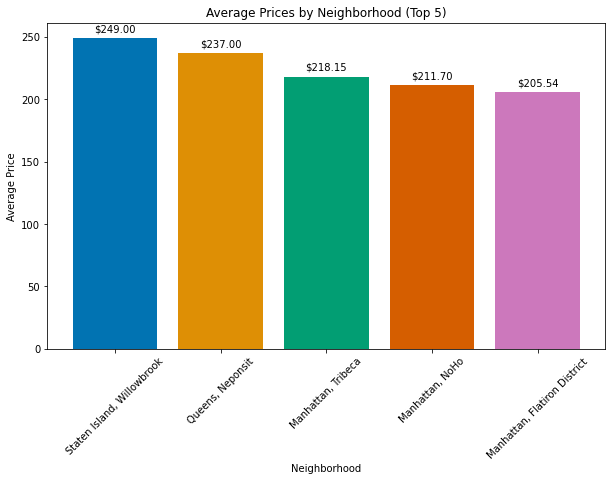

In [48]:
# Calculate the average price per neighborhood
average_prices = filtered_prices.groupby("nbhood_full")["price"].mean().sort_values(ascending=False).head(5)

# Set color palette for color blindness
colors = sns.color_palette("colorblind")

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_prices.index, average_prices.values, color=colors)

# Add labels to each bar
for i, price in enumerate(average_prices.values):
    plt.text(i, price + 5, f"${price:.2f}", ha='center', color='black')

# Customize plot
plt.title('Average Prices by Neighborhood (Top 5)')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [49]:
# Step 4. Comparing costs to the private rental market

In [50]:
# Add a new column to the prices DataFrame, price_per_month

prices["price_per_month"] = prices["price"] * 365 / 12

In [51]:
prices["price_per_month"]

0        6843.750000
1        2707.083333
2        6083.333333
3        2402.916667
4        4562.500000
            ...     
25204    3923.750000
25205    1368.750000
25206    7147.916667
25207    3041.666667
25208     912.500000
Name: price_per_month, Length: 25202, dtype: float64

In [52]:
# Calculate average_price_per_month

average_price_per_month = round(prices["price_per_month"].mean(), 2)

In [53]:
average_price_per_month

4313.61

In [54]:
# listing costs, on average, per nigh  in New York City costs, on average, $3,100 per month.  

In [55]:
difference = round((average_price_per_month - 3100),2)

In [56]:
difference

1213.61

In [57]:
# Step 5. Cleaning the room_type column

In [58]:
# Convert the room_type column to lowercase

room_types["room_type"] = room_types["room_type"].str.lower()

In [59]:
room_types["room_type"]

0        entire home/apt
1        entire home/apt
2        entire home/apt
3           private room
4        entire home/apt
              ...       
25204       private room
25205       private room
25206       private room
25207    entire home/apt
25208       private room
Name: room_type, Length: 25209, dtype: object

In [60]:
# Update the room_type column to category data type

room_types["room_type"] = room_types["room_type"].astype("category")

In [61]:
room_types["room_type"].dtype

CategoricalDtype(categories=['entire home/apt', 'private room', 'shared room'], ordered=False)

In [62]:
# Create the variable room_frequencies

room_frequencies = room_types["room_type"].value_counts()

In [63]:
room_frequencies

entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64

In [64]:
# Plot a graph showing room_frequencies

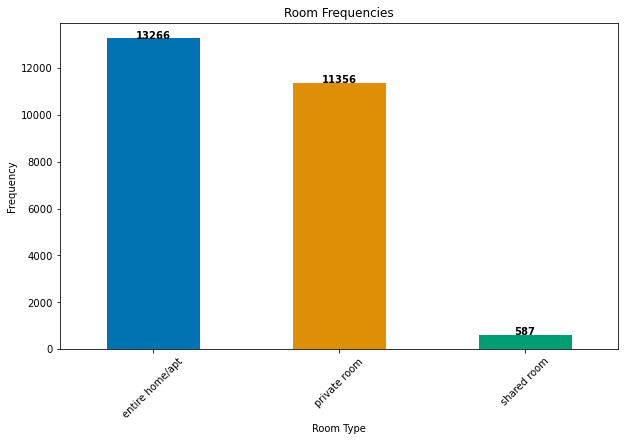

In [65]:
# Set color palette for color-blind friendly colors
colors = sns.color_palette('colorblind')

# Plot the room frequencies
plt.figure(figsize=(10, 6))
room_frequencies.plot(kind='bar', color=colors)
plt.title('Room Frequencies')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Add values to each bar
for i, v in enumerate(room_frequencies):
    plt.text(i, v + 5, str(v), ha='center', color='black', fontweight='bold')

plt.show()


In [66]:
# Step 6. What timeframe are we working with?

In [67]:
# Change the data type of the last_review column to datetime

reviews["last_review"] = pd.to_datetime(reviews["last_review"])

In [68]:
reviews["last_review"].dtype

dtype('<M8[ns]')

In [69]:
# Create first_reviewed, the earliest review date

first_reviewed = reviews["last_review"].dt.date.min()

In [70]:
first_reviewed

datetime.date(2019, 1, 1)

In [71]:
import pandas as pd

# Convert first_reviewed to a datetime object
first_reviewed_date = pd.to_datetime(first_reviewed)

# Create a DataFrame to display the first review date
first_review_df = pd.DataFrame({'First Reviewed': [first_reviewed_date]})

# Display the DataFrame
print(first_review_df)



  First Reviewed
0     2019-01-01


In [72]:
import pandas as pd

# Calculate the first reviewed date
first_reviewed = reviews["last_review"].dt.date.min()

# Convert first_reviewed to a datetime object
first_reviewed_date = pd.to_datetime(first_reviewed)

# Display the first review date
print("First Reviewed Date:")
print("--------------------")
print(f"Year:  {first_reviewed_date.year}")
print(f"Month: {first_reviewed_date.strftime('%B')}")
print(f"Day:   {first_reviewed_date.day}")


First Reviewed Date:
--------------------
Year:  2019
Month: January
Day:   1


In [73]:
# Create last_reviewed, the most recent review date

last_reviewed = reviews["last_review"].dt.date.max()

In [74]:
last_reviewed

datetime.date(2019, 7, 9)

In [75]:
# Calculate the last reviewed date
last_reviewed = reviews["last_review"].dt.date.max()

# Convert last_reviewed to a datetime object
last_reviewed_date = pd.to_datetime(last_reviewed)

# Create a DataFrame to display the last review date
last_review_df = pd.DataFrame({'Last Reviewed': [last_reviewed_date]})

# Display the DataFrame
print(last_review_df)


  Last Reviewed
0    2019-07-09


In [76]:
# Calculate the last reviewed date
last_reviewed = reviews["last_review"].dt.date.max()

# Convert last_reviewed to a datetime object
last_reviewed_date = pd.to_datetime(last_reviewed)

# Display the last review date
print("Last Reviewed Date:")
print("-------------------")
print(f"Year:  {last_reviewed_date.year}")
print(f"Month: {last_reviewed_date.strftime('%B')}")
print(f"Day:   {last_reviewed_date.day}")


Last Reviewed Date:
-------------------
Year:  2019
Month: July
Day:   9


In [77]:
# Step 7. Joining the DataFrames

In [78]:
# Merge prices and room_types to create rooms_and_prices

rooms_and_prices = prices.merge(room_types, how="outer", on="listing_id")

In [79]:
rooms_and_prices

,listing_id,price,nbhood_full,price_per_month,description,room_type
0,2595,225.0,"Manhattan, Midtown",6843.750000,Skylit Midtown Castle,entire home/apt
1,3831,89.0,"Brooklyn, Clinton Hill",2707.083333,Cozy Entire Floor of Brownstone,entire home/apt
2,5099,200.0,"Manhattan, Murray Hill",6083.333333,Large Cozy 1 BR Apartment In Midtown East,entire home/apt
3,5178,79.0,"Manhattan, Hell's Kitchen",2402.916667,Large Furnished Room Near B'way,private room
4,5238,150.0,"Manhattan, Chinatown",4562.500000,Cute & Cozy Lower East Side 1 bdrm,entire home/apt
...,...,...,...,...,...,...
25204,20639628,NaN,NaN,NaN,Spacious comfortable master bedroom with nice ...,private room
25205,20639792,NaN,NaN,NaN,Contemporary bedroom in brownstone with nice view,private room
25206,20639914,NaN,NaN,NaN,Cozy yet spacious private brownstone bedroom,private room
25207,21291569,NaN,NaN,NaN,Coliving in Brooklyn! Modern design / Shared room,shared room


In [80]:
rooms_and_prices.shape

(25209, 6)

In [81]:
rooms_and_prices.describe()

,listing_id,price,price_per_month
count,2.520900e+04,25202.000000,25202.000000
mean,2.068922e+07,141.817316,4313.610031
std,1.102928e+07,147.350650,4481.915598
min,2.595000e+03,10.000000,304.166667
25%,1.202273e+07,69.000000,2098.750000
50%,2.234391e+07,105.000000,3193.750000
75%,3.037669e+07,175.000000,5322.916667
max,3.645581e+07,7500.000000,228125.000000


In [82]:
# Merge rooms_and_prices with the reviews DataFrame to create airbnb_merged

airbnb_merged = rooms_and_prices.merge(reviews, how="outer", on="listing_id")

In [83]:
airbnb_merged.shape

(25209, 8)

In [84]:
airbnb_merged.describe()

,listing_id,price,price_per_month
count,2.520900e+04,25202.000000,25202.000000
mean,2.068922e+07,141.817316,4313.610031
std,1.102928e+07,147.350650,4481.915598
min,2.595000e+03,10.000000,304.166667
25%,1.202273e+07,69.000000,2098.750000
50%,2.234391e+07,105.000000,3193.750000
75%,3.037669e+07,175.000000,5322.916667
max,3.645581e+07,7500.000000,228125.000000


In [85]:
airbnb_merged

,listing_id,price,nbhood_full,price_per_month,description,room_type,host_name,last_review
0,2595,225.0,"Manhattan, Midtown",6843.750000,Skylit Midtown Castle,entire home/apt,Jennifer,2019-05-21
1,3831,89.0,"Brooklyn, Clinton Hill",2707.083333,Cozy Entire Floor of Brownstone,entire home/apt,LisaRoxanne,2019-07-05
2,5099,200.0,"Manhattan, Murray Hill",6083.333333,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Chris,2019-06-22
3,5178,79.0,"Manhattan, Hell's Kitchen",2402.916667,Large Furnished Room Near B'way,private room,Shunichi,2019-06-24
4,5238,150.0,"Manhattan, Chinatown",4562.500000,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Ben,2019-06-09
...,...,...,...,...,...,...,...,...
25204,20639628,NaN,NaN,NaN,Spacious comfortable master bedroom with nice ...,private room,Adeyemi,2019-06-15
25205,20639792,NaN,NaN,NaN,Contemporary bedroom in brownstone with nice view,private room,Adeyemi,2019-06-21
25206,20639914,NaN,NaN,NaN,Cozy yet spacious private brownstone bedroom,private room,Adeyemi,2019-06-23
25207,21291569,NaN,NaN,NaN,Coliving in Brooklyn! Modern design / Shared room,shared room,Sergii,2019-06-22


In [86]:
# Drop missing values from airbnb_merged

airbnb_merged.dropna(inplace=True)

In [87]:
airbnb_merged

,listing_id,price,nbhood_full,price_per_month,description,room_type,host_name,last_review
0,2595,225.0,"Manhattan, Midtown",6843.750000,Skylit Midtown Castle,entire home/apt,Jennifer,2019-05-21
1,3831,89.0,"Brooklyn, Clinton Hill",2707.083333,Cozy Entire Floor of Brownstone,entire home/apt,LisaRoxanne,2019-07-05
2,5099,200.0,"Manhattan, Murray Hill",6083.333333,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Chris,2019-06-22
3,5178,79.0,"Manhattan, Hell's Kitchen",2402.916667,Large Furnished Room Near B'way,private room,Shunichi,2019-06-24
4,5238,150.0,"Manhattan, Chinatown",4562.500000,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Ben,2019-06-09
...,...,...,...,...,...,...,...,...
25197,36425863,129.0,"Manhattan, Upper East Side",3923.750000,Lovely Privet Bedroom with Privet Restroom,private room,Rusaa,2019-07-07
25198,36427429,45.0,"Queens, Flushing",1368.750000,No.2 with queen size bed,private room,H Ai,2019-07-07
25199,36438336,235.0,"Staten Island, Great Kills",7147.916667,Seas The Moment,private room,Ben,2019-07-07
25200,36442252,100.0,"Bronx, Mott Haven",3041.666667,1B-1B apartment near by Metro,entire home/apt,Blaine,2019-07-07


In [88]:
# check for duplicates.
duplicates = airbnb_merged[airbnb_merged.duplicated(keep=False)]

In [89]:
print(duplicates)


Empty DataFrame
Columns: [listing_id, price, nbhood_full, price_per_month, description, room_type, host_name, last_review]
Index: []


In [90]:
# Step 8. Analyzing listing prices by NYC borough

In [91]:
# Extract information from the nbhood_full column and store as a new column, borough

airbnb_merged["borough"] = airbnb_merged["nbhood_full"].str.partition(",")[0]

In [92]:
print(airbnb_merged["borough"])

0            Manhattan
1             Brooklyn
2            Manhattan
3            Manhattan
4            Manhattan
             ...      
25197        Manhattan
25198           Queens
25199    Staten Island
25200            Bronx
25201         Brooklyn
Name: borough, Length: 25184, dtype: object


In [93]:
# Group by borough and calculate summary statistics

boroughs = airbnb_merged.groupby("borough")["price"].agg(["sum", "mean", "median", "count"])

In [94]:
boroughs

,sum,mean,median,count
borough,,,,
Bronx,55156.0,79.247126,65.0,696
Brooklyn,1275250.0,122.021816,95.0,10451
Manhattan,1898417.0,184.044304,149.0,10315
Queens,320715.0,92.826339,70.0,3455
Staten Island,22974.0,86.044944,71.0,267


In [95]:
# Round boroughs to 2 decimal places, and sort by mean in descending order

boroughs = boroughs.round(2).sort_values("mean", ascending=False)

In [96]:
boroughs

,sum,mean,median,count
borough,,,,
Manhattan,1898417.0,184.04,149.0,10315
Brooklyn,1275250.0,122.02,95.0,10451
Queens,320715.0,92.83,70.0,3455
Staten Island,22974.0,86.04,71.0,267
Bronx,55156.0,79.25,65.0,696


In [97]:
# Plot a graph of descriptive statistics for each borough

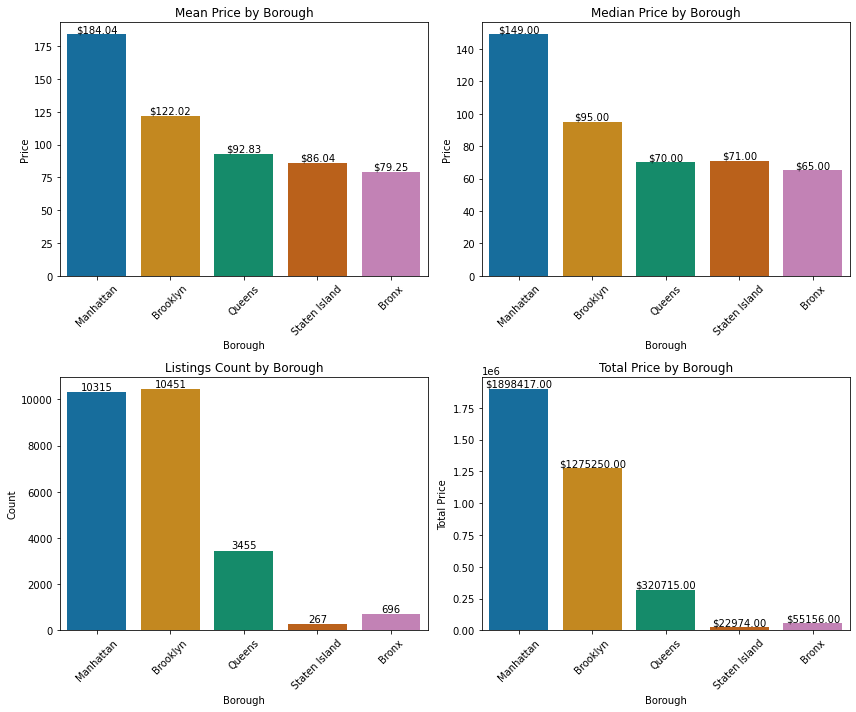

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge prices and room_types on listing_id
rooms_and_prices = prices.merge(room_types, how="outer", on="listing_id")

# Merge rooms_and_prices and reviews on listing_id
airbnb_merged = rooms_and_prices.merge(reviews, how="outer", on="listing_id")

# Drop rows with missing values
airbnb_merged.dropna(inplace=True)

# Create the "borough" column
airbnb_merged["borough"] = airbnb_merged["nbhood_full"].str.partition(",")[0]

# Group by borough and calculate summary statistics
boroughs = airbnb_merged.groupby("borough")["price"].agg(["sum", "mean", "median", "count"])

# Round boroughs to 2 decimal places, and sort by mean in descending order
boroughs = boroughs.round(2).sort_values("mean", ascending=False)

# Create a larger plot area
plt.figure(figsize=(12, 10))

# Plot the mean price
plt.subplot(2, 2, 1)
sns.barplot(data=boroughs, x=boroughs.index, y="mean", palette="colorblind")
plt.title("Mean Price by Borough")
plt.xlabel("Borough")
plt.ylabel("Price")
plt.xticks(rotation=45)

# Add value labels to the bars
for i, mean_price in enumerate(boroughs["mean"]):
    plt.text(i, mean_price, f"${mean_price:.2f}", ha="center", va="bottom")

# Plot the median price
plt.subplot(2, 2, 2)
sns.barplot(data=boroughs, x=boroughs.index, y="median", palette="colorblind")
plt.title("Median Price by Borough")
plt.xlabel("Borough")
plt.ylabel("Price")
plt.xticks(rotation=45)

# Add value labels to the bars
for i, median_price in enumerate(boroughs["median"]):
    plt.text(i, median_price, f"${median_price:.2f}", ha="center", va="bottom")

# Plot the total listings count
plt.subplot(2, 2, 3)
sns.barplot(data=boroughs, x=boroughs.index, y="count", palette="colorblind")
plt.title("Listings Count by Borough")
plt.xlabel("Borough")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Add value labels to the bars
for i, count in enumerate(boroughs["count"]):
    plt.text(i, count, str(count), ha="center", va="bottom")

# Plot the total price
plt.subplot(2, 2, 4)
sns.barplot(data=boroughs, x=boroughs.index, y="sum", palette="colorblind")
plt.title("Total Price by Borough")
plt.xlabel("Borough")
plt.ylabel("Total Price")
plt.xticks(rotation=45)

# Add value labels to the bars
for i, total_price in enumerate(boroughs["sum"]):
    plt.text(i, total_price, f"${total_price:.2f}", ha="center", va="bottom")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [99]:
# Step 9. Price range by borough

In [100]:
# Create labels for the price range, label_names

label_names = ["Budget", "Average", "Expensive", "Extravagant"]

In [101]:
label_names

['Budget', 'Average', 'Expensive', 'Extravagant']

In [102]:
# Create the label ranges, ranges

ranges = [0, 69, 175, 350, np.inf]

In [103]:
ranges

[0, 69, 175, 350, inf]

In [104]:
# Insert new column, price_range, into DataFrame

airbnb_merged["price_range"] = pd.cut(airbnb_merged["price"], bins=ranges, labels=label_names)

In [105]:
airbnb_merged

,listing_id,price,nbhood_full,price_per_month,description,room_type,host_name,last_review,borough,price_range
0,2595,225.0,"Manhattan, Midtown",6843.750000,Skylit Midtown Castle,entire home/apt,Jennifer,2019-05-21,Manhattan,Expensive
1,3831,89.0,"Brooklyn, Clinton Hill",2707.083333,Cozy Entire Floor of Brownstone,entire home/apt,LisaRoxanne,2019-07-05,Brooklyn,Average
2,5099,200.0,"Manhattan, Murray Hill",6083.333333,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Chris,2019-06-22,Manhattan,Expensive
3,5178,79.0,"Manhattan, Hell's Kitchen",2402.916667,Large Furnished Room Near B'way,private room,Shunichi,2019-06-24,Manhattan,Average
4,5238,150.0,"Manhattan, Chinatown",4562.500000,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Ben,2019-06-09,Manhattan,Average
...,...,...,...,...,...,...,...,...,...,...
25197,36425863,129.0,"Manhattan, Upper East Side",3923.750000,Lovely Privet Bedroom with Privet Restroom,private room,Rusaa,2019-07-07,Manhattan,Average
25198,36427429,45.0,"Queens, Flushing",1368.750000,No.2 with queen size bed,private room,H Ai,2019-07-07,Queens,Budget
25199,36438336,235.0,"Staten Island, Great Kills",7147.916667,Seas The Moment,private room,Ben,2019-07-07,Staten Island,Expensive
25200,36442252,100.0,"Bronx, Mott Haven",3041.666667,1B-1B apartment near by Metro,entire home/apt,Blaine,2019-07-07,Bronx,Average


In [106]:
# Calculate occurence frequencies for each label, prices_by_borough

prices_by_borough = airbnb_merged.groupby(["borough", "price_range"])["price_range"].count()

In [107]:
prices_by_borough

borough        price_range
Bronx          Budget          381
               Average         285
               Expensive        25
               Extravagant       5
Brooklyn       Budget         3194
               Average        5532
               Expensive      1466
               Extravagant     259
Manhattan      Budget         1148
               Average        5285
               Expensive      3072
               Extravagant     810
Queens         Budget         1631
               Average        1505
               Expensive       291
               Extravagant      28
Staten Island  Budget          124
               Average         123
               Expensive        20
               Extravagant       0
Name: price_range, dtype: int64

In [108]:
# Plot a graph of prices_by_borough

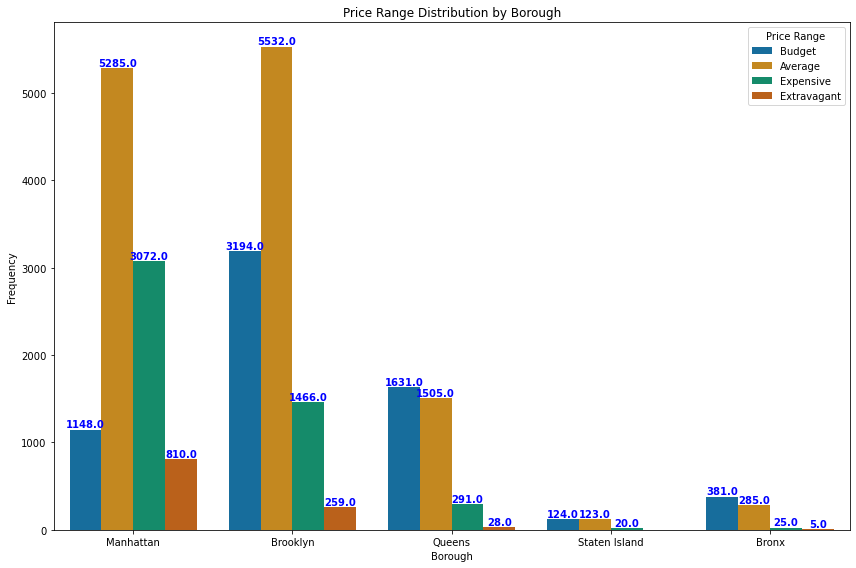

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the graph
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=airbnb_merged, x="borough", hue="price_range", palette="colorblind")

# Add value labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom',fontweight='bold',color = 'blue')

plt.title("Price Range Distribution by Borough")
plt.xlabel("Borough")
plt.ylabel("Frequency")
plt.legend(title="Price Range")
plt.tight_layout()
plt.show()



In [110]:
# Step 10. Storing the final result

In [111]:
solution = {'avg_price':avg_price,
            'average_price_per_month': average_price_per_month,  
            'difference':difference,          
            'room_frequencies':room_frequencies, 
            'first_reviewed': first_reviewed,
            'last_reviewed': last_reviewed,
            'prices_by_borough':prices_by_borough}
print(solution)

{'avg_price': 141.82, 'average_price_per_month': 4313.61, 'difference': 1213.61, 'room_frequencies': entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64, 'first_reviewed': datetime.date(2019, 1, 1), 'last_reviewed': datetime.date(2019, 7, 9), 'prices_by_borough': borough        price_range
Bronx          Budget          381
               Average         285
               Expensive        25
               Extravagant       5
Brooklyn       Budget         3194
               Average        5532
               Expensive      1466
               Extravagant     259
Manhattan      Budget         1148
               Average        5285
               Expensive      3072
               Extravagant     810
Queens         Budget         1631
               Average        1505
               Expensive       291
               Extravagant      28
Staten Island  Budget          124
               Average         123
               Expensive  

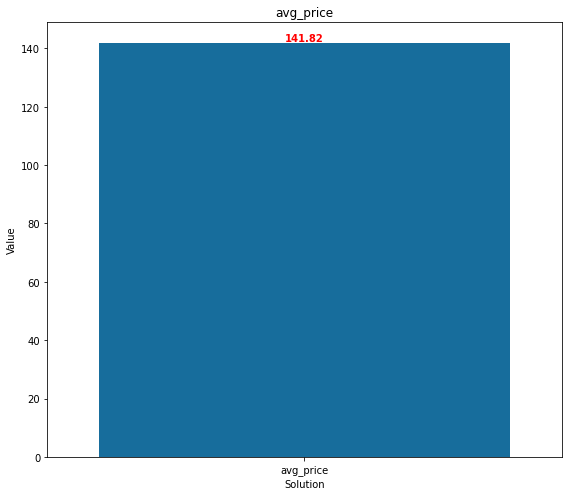

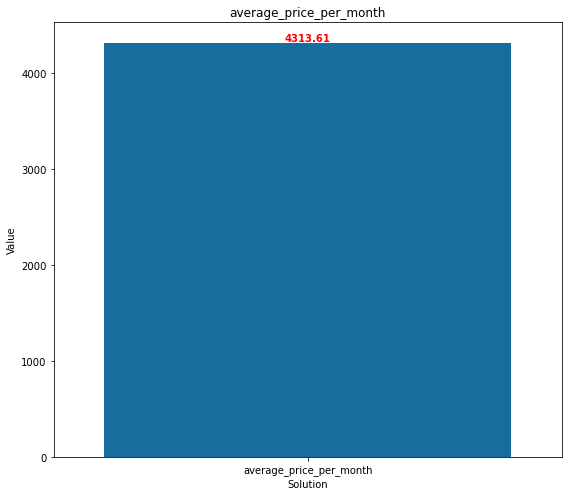

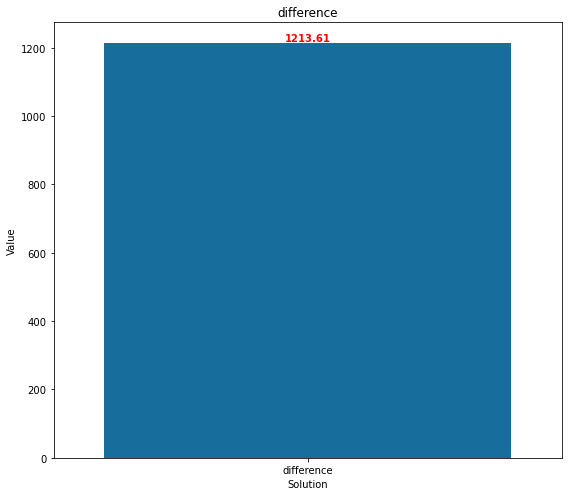

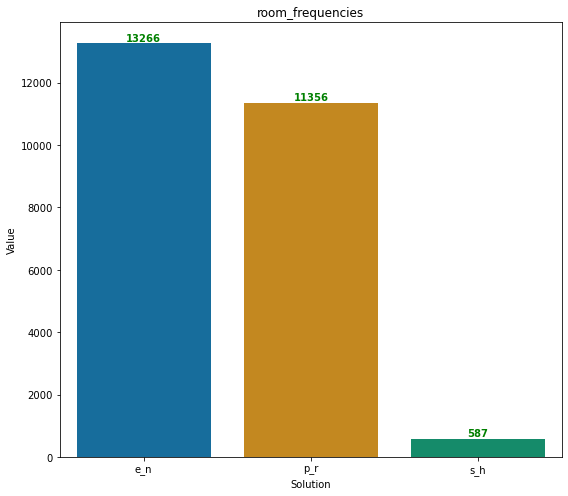

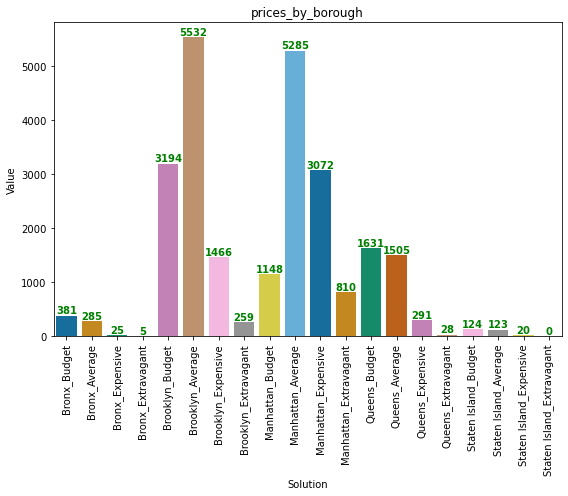

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert solution keys and values to lists
solution_keys = list(solution.keys())
solution_values = list(solution.values())

# Convert values to appropriate data types
solution_values = [float(value) if isinstance(value, (int, float)) else value for value in solution_values]

# Iterate over the solutions and plot them individually
for key, value in zip(solution_keys, solution_values):
    # Exclude 'first_reviewed' and 'last_reviewed' from plotting
    if key in ['first_reviewed', 'last_reviewed']:
        continue
    
    # Create a new figure and axes for each solution
    fig, ax = plt.subplots(figsize=(8, 7))
    
    # Plot the solution
    if isinstance(value, (int, float)):
        sns.barplot(x=[key], y=[value], palette="colorblind")
        ax.text(0, value, str(value), ha='center', va='bottom', fontsize=10,fontweight='bold',color='red')
    else:
        # Flatten the value array
        flat_values = value.values.flatten()
        # Create corresponding index array
        index_values = [f"{index[0]}_{index[1]}" for index in value.index]
        sns.barplot(x=index_values, y=flat_values, palette="colorblind")
        for i, v in enumerate(flat_values):
            ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10,fontweight='bold',color='green')
    
    # Set the axis labels and title
    plt.xlabel("Solution")
    plt.ylabel("Value")
    plt.title(key)
    
    # Rotate x-axis labels if there are too many
    if not isinstance(value, (int, float)) and len(value) > 10:
        plt.xticks(rotation=90)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


In [113]:
# Export the DataFrame to a CSV file

airbnb_merged.to_csv('cleaned_and_merged_data.csv', index=False)

In [114]:
airbnb_merged.size

251840

In [115]:
# Plot a graph to see prices per room_types

In [116]:
print("Columns in room_types DataFrame:", room_types.columns)
print("Columns in prices DataFrame:", prices.columns)


Columns in room_types DataFrame: Index(['listing_id', 'description', 'room_type'], dtype='object')
Columns in prices DataFrame: Index(['listing_id', 'price', 'nbhood_full', 'price_per_month'], dtype='object')


In [117]:
merged_data = pd.merge(room_types, prices, on='listing_id')


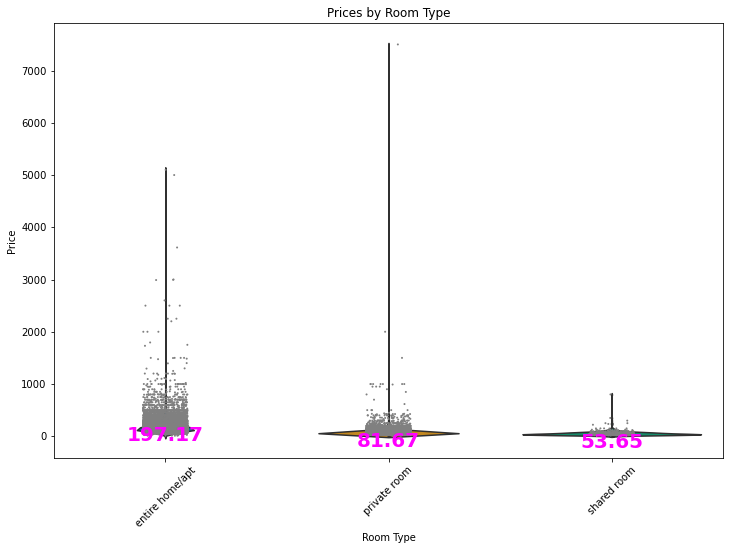

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge the two DataFrames based on the common column 'listing_id'
merged_data = pd.merge(room_types, prices, on='listing_id')

# Set color palette for color-blind friendly colors
colors = sns.color_palette('colorblind')

# Increase plot area
plt.figure(figsize=(12, 8))

# Plot the violin plot
ax = sns.violinplot(x=merged_data["room_type"], y=merged_data["price"], palette=colors)

# Add values to each box
means = merged_data.groupby("room_type")["price"].mean()
vertical_offset = merged_data["price"].mean() * 0.01
for xtick in ax.get_xticks():
    rounded_mean = round(means[xtick], 2)  # Round the mean to 1 decimal point
    ax.text(xtick, means[xtick] + vertical_offset, rounded_mean,
            horizontalalignment='center', verticalalignment='top', color='magenta', fontweight='bold', size=20)

# Add individual values using stripplot
ax = sns.stripplot(x=merged_data["room_type"], y=merged_data["price"], color="grey", size=2)

# Customize plot
plt.title('Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.show()
